In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("BRCA.csv")

In [4]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(341, 16)

In [11]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [15]:
missing_values = df.isna().sum().sort_values(ascending = False)
duplicates = df.duplicated().sum()

missing_values, duplicates

(Date_of_Last_Visit    24
 Patient_Status        20
 Patient_ID             7
 Age                    7
 Gender                 7
 Protein1               7
 Protein2               7
 Protein3               7
 Protein4               7
 Tumour_Stage           7
 Histology              7
 ER status              7
 PR status              7
 HER2 status            7
 Surgery_type           7
 Date_of_Surgery        7
 dtype: int64,
 6)

In [17]:
df.groupby(['Gender']).size()

Gender
FEMALE    330
MALE        4
dtype: int64

In [18]:
df.groupby(['Tumour_Stage']).size()

Tumour_Stage
I       64
II     189
III     81
dtype: int64

In [19]:
df.groupby(['HER2 status']).size()

HER2 status
Negative    305
Positive     29
dtype: int64

In [22]:
df.groupby(['ER status']).size()

ER status
Positive    334
dtype: int64

In [23]:
df.groupby(['PR status']).size()

PR status
Positive    334
dtype: int64

In [53]:
status_count = df['Patient_Status'].value_counts()
status_count

Patient_Status
Alive    255
Dead      66
Name: count, dtype: int64

In [57]:
surgery_type_counts = df['Surgery_type'].value_counts()
surgery_type_counts

Surgery_type
Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: count, dtype: int64

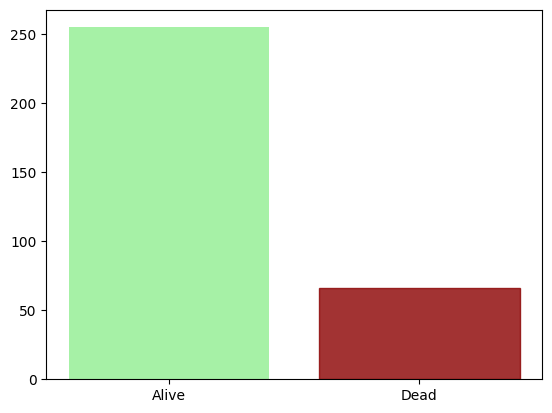

In [28]:
barplot = plt.bar(status_count.index, status_count, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

[Text(0.5, 1.0, 'Number of alive and deaths in Tumour column')]

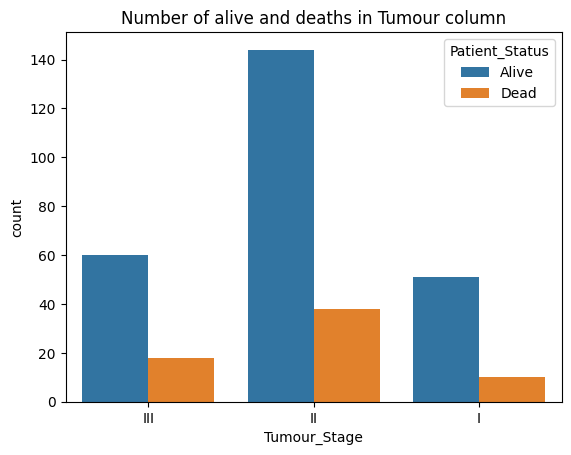

In [48]:
sns.countplot (data=df, x='Tumour_Stage', hue= 'Patient_Status').set(
    title="Number of alive and deaths in Tumour column")

[Text(0.5, 1.0, 'Number of alive and deaths in Histology column')]

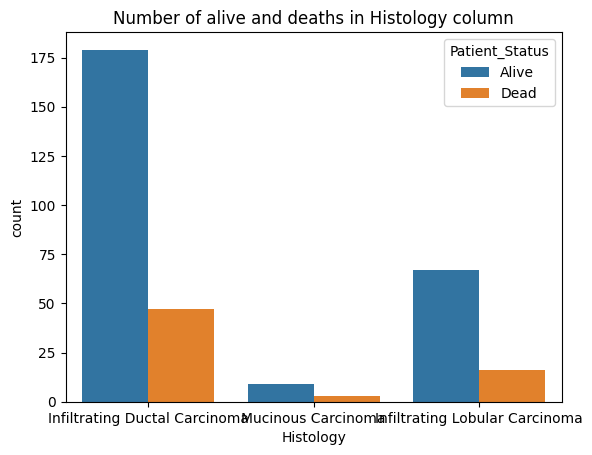

In [34]:
sns.countplot (data=df, x='Histology', hue= 'Patient_Status').set(
    title="Number of alive and deaths in Histology column")

[Text(0.5, 1.0, 'Number of alive and deaths in HER2 status column')]

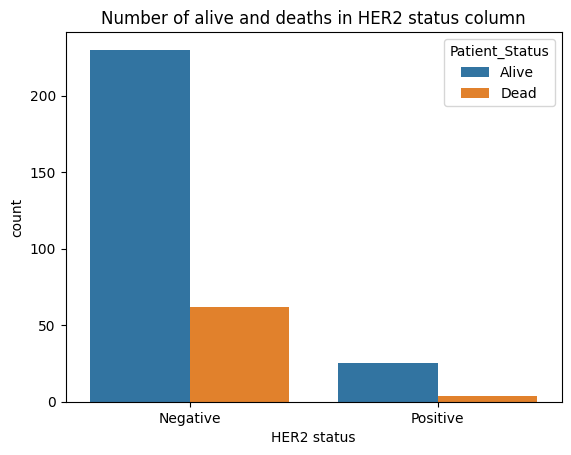

In [43]:
sns.countplot (data=df, x='HER2 status', hue= 'Patient_Status').set(
    title="Number of alive and deaths in HER2 status column")

[Text(0.5, 1.0, 'Number of alive and deaths in age_GP column')]

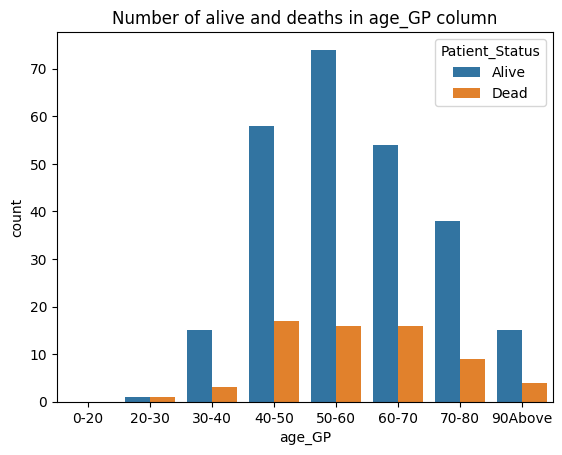

In [47]:
sns.countplot (data=df, x='age_GP', hue= 'Patient_Status').set(
    title="Number of alive and deaths in age_GP column")